# 🍚 Pirinç Görüntü Sınıflandırma Modeli - MobilenetV2
https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/

## 📚 1. Kütüphanelerin İçe Aktarılması

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import numpy as np
import os

# GPU bellek büyümesini sınırla
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
        )
    except RuntimeError as e:
        print(e)

## 🗂️ 2. Veri Yolu ve Sınıf Sayısının Tanımlanması

In [2]:
data_path = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'  # Veri yolu
num_classes = 5  # Sınıf sayısı

## 🔧 3. Veri Yükleme ve Ön İşleme Fonksiyonu

In [3]:
def load_data(path, size=(128, 128)):  # Görüntü boyutunu daha da küçülttük
    return tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=size,
        batch_size=16,  # Batch boyutunu daha da azalttık
        validation_split=0.2,
        subset='training',
        seed=123
    )

## 📥 4. Eğitim Verisinin Yüklenmesi

In [4]:
train_data = load_data(data_path)
train_data = train_data.prefetch(tf.data.AUTOTUNE)

# Doğrulama seti oluştur
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    data_path,
    image_size=(128, 128),
    batch_size=16,
    validation_split=0.2,
    subset='validation',
    seed=123
)
val_data = val_data.prefetch(tf.data.AUTOTUNE)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


## 🧠 5. Transfer Öğrenme için MobileNetV2 Modelinin Hazırlanması

In [5]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 🏗️ 6. Özel Model Oluşturma

In [6]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),  # Nöron sayısını daha da azalttık
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


## ⚙️ 7. Model Derleme

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## 🏋️ 8. Model Eğitimi

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    train_data, 
    validation_data=val_data,
    epochs=10,  # Epoch sayısını azalttık
    callbacks=[callback]
)

Epoch 1/10


I0000 00:00:1725985088.806985     868 service.cc:145] XLA service 0x7be740002dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725985088.807023     868 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  14/3750 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - accuracy: 0.3312 - loss: 2.2053 

I0000 00:00:1725985093.647380     868 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3750/3750 ━━━━━━━━━━━━━━━━━━━━ 123s 30ms/step - accuracy: 0.8727 - loss: 0.3348 - val_accuracy: 0.9761 - val_loss: 0.0683
Epoch 2/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.9465 - loss: 0.1469 - val_accuracy: 0.9775 - val_loss: 0.0661
Epoch 3/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.9549 - loss: 0.1313 - val_accuracy: 0.9792 - val_loss: 0.0590
Epoch 4/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9542 - loss: 0.1278 - val_accuracy: 0.9744 - val_loss: 0.0747
Epoch 5/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9592 - loss: 0.1161 - val_accuracy: 0.9789 - val_loss: 0.0647
Epoch 6/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9607 - loss: 0.1151 - val_accuracy: 0.9815 - val_loss: 0.0520
Epoch 7/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9632 - loss: 0.1091 - val_accuracy: 0.9807 - val_loss: 0.0564
Epoch 8/10
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 35s 9ms/step - accuracy: 0.9639 - loss: 0.1067 - 

## 💾 9. Eğitilmiş Modelin Kaydedilmesi

In [9]:
model.save('rice_classification_model.h5')  # Modeli kaydet

## 📊 10. Eğitim Sonuçlarının Görselleştirilmesi

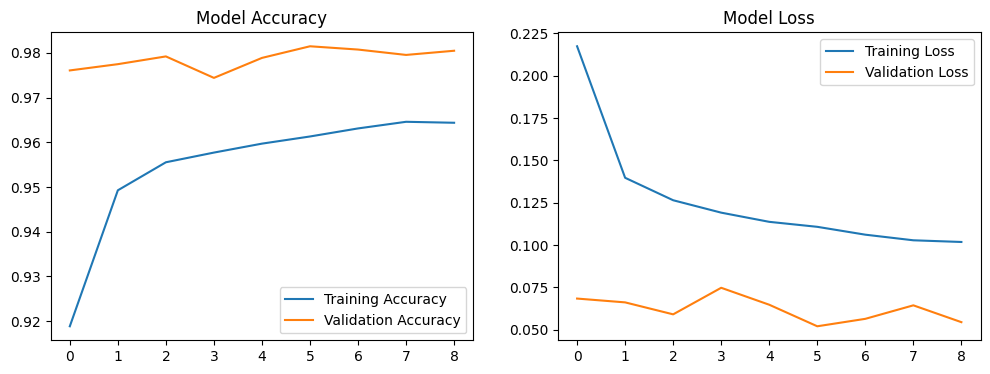

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [11]:
# Your notebook tried to allocate more memory than is available. It has restarted.